In [6]:
import numpy as np
import pandas as pd
from collections import Counter

Jamendo training set:

In [39]:
train_split_path = '../../splits/jamendo_moodtheme-train.tsv'

train_tags = []
for line in open(train_split_path, 'r'):
    tags = line.strip().split('\t')[2:]
    train_tags.extend(tags)
train_tags = train_tags[1:]

sorted_train_tags = Counter(train_tags).most_common()
sorted_train_tags = [x[0].split('---')[-1] for x in sorted_train_tags]

In [40]:
sorted_counter_values = []

counter = Counter(train_tags)
    
for tag in sorted_train_tags:
    tag = 'mood/theme---'+tag
    sorted_counter_values.append(counter[tag])

Text(0.5, 1.0, 'Jamendo Train Tag Distribution')

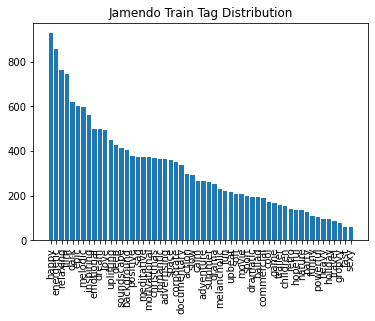

In [13]:
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
plt.rc('xtick',labelsize=5)
plt.bar(sorted_train_tags, sorted_counter_values)
plt.title('Jamendo Train Tag Distribution')

In [15]:
print('Most common tag count:', sorted_counter_values[0])
print('Least common tag count:', sorted_counter_values[-1])

Most common tag count: 927
Least common tag count: 59


Jamendo validation split:

In [16]:
train_split_path = '../../splits/jamendo_moodtheme-validation.tsv'

train_tags = []
for line in open(train_split_path, 'r'):
    tags = line.strip().split('\t')[2:]
    train_tags.extend(tags)
train_tags = train_tags[1:]

In [17]:
sorted_counter_values = []

counter = Counter(train_tags)
    
for tag in sorted_train_tags:
    tag = 'mood/theme---'+tag
    sorted_counter_values.append(counter[tag])

Text(0.5, 1.0, 'Jamendo Validation Tag Distribution')

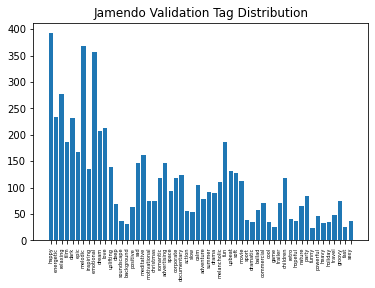

In [19]:
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
plt.rc('xtick',labelsize=5)
plt.bar(sorted_train_tags, sorted_counter_values)
plt.title('Jamendo Validation Tag Distribution')

In [20]:
print('Most common tag count:', max(sorted_counter_values))
print('Least common tag count:', min(sorted_counter_values))

Most common tag count: 392
Least common tag count: 23


Jamendo Test set:

In [21]:
train_split_path = '../../splits/jamendo_moodtheme-test.tsv'

train_tags = []
for line in open(train_split_path, 'r'):
    tags = line.strip().split('\t')[1:]
    train_tags.extend(tags)
train_tags = train_tags[1:]

In [22]:
sorted_counter_values = []

counter = Counter(train_tags)
    
for tag in sorted_train_tags:
    tag = 'mood/theme---'+tag
    sorted_counter_values.append(counter[tag])

Text(0.5, 1.0, 'Jamendo Test Tag Distribution')

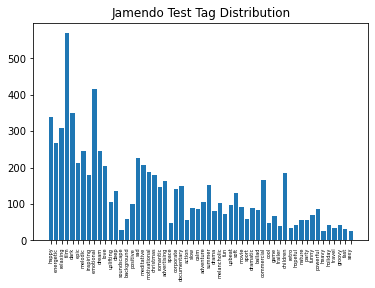

In [23]:
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
plt.rc('xtick',labelsize=5)
plt.bar(sorted_train_tags, sorted_counter_values)
plt.title('Jamendo Test Tag Distribution')

In [24]:
print('Most common tag count:', max(sorted_counter_values))
print('Least common tag count:', min(sorted_counter_values))

Most common tag count: 569
Least common tag count: 25


Million Song Dataset:

Most common tag count: 6195
Least common tag count: 0


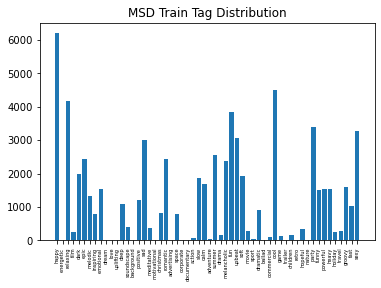

In [47]:
train_split_path = '../../splits/msd_split0_moodtheme-train.tsv'

train_tags = []
for line in open(train_split_path, 'r'):
    tags = line.strip().split('\t')[1:]
    train_tags.extend(tags)
train_tags = train_tags[1:]

sorted_counter_values = []

counter = Counter(train_tags)
    
for tag in sorted_train_tags:
    tag = 'mood/theme---'+tag
    sorted_counter_values.append(counter[tag])
    
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
plt.rc('xtick',labelsize=5)
plt.bar(sorted_train_tags, sorted_counter_values)
plt.title('MSD Train Tag Distribution')

print('Most common tag count:', max(sorted_counter_values))
print('Least common tag count:', min(sorted_counter_values))

Analyze best model:

In [29]:
preds = np.load('best_predictions/test_predictions.npy')
gt = np.load('best_predictions/test_ground_truth.npy')

In [35]:

TAGS = [
'mood/theme---action',
'mood/theme---adventure',
'mood/theme---advertising',
'mood/theme---background',
'mood/theme---ballad',
'mood/theme---calm',
'mood/theme---children',
'mood/theme---christmas',
'mood/theme---commercial',
'mood/theme---cool',
'mood/theme---corporate',
'mood/theme---dark',
'mood/theme---deep',
'mood/theme---documentary',
'mood/theme---drama',
'mood/theme---dramatic',
'mood/theme---dream',
'mood/theme---emotional',
'mood/theme---energetic',
'mood/theme---epic',
'mood/theme---fast',
'mood/theme---film',
'mood/theme---fun',
'mood/theme---funny',
'mood/theme---game',
'mood/theme---groovy',
'mood/theme---happy',
'mood/theme---heavy',
'mood/theme---holiday',
'mood/theme---hopeful',
'mood/theme---inspiring',
'mood/theme---love',
'mood/theme---meditative',
'mood/theme---melancholic',
'mood/theme---melodic',
'mood/theme---motivational',
'mood/theme---movie',
'mood/theme---nature',
'mood/theme---party',
'mood/theme---positive',
'mood/theme---powerful',
'mood/theme---relaxing',
'mood/theme---retro',
'mood/theme---romantic',
'mood/theme---sad',
'mood/theme---sexy',
'mood/theme---slow',
'mood/theme---soft',
'mood/theme---soundscape',
'mood/theme---space',
'mood/theme---sport',
'mood/theme---summer',
'mood/theme---trailer',
'mood/theme---travel',
'mood/theme---upbeat',
'mood/theme---uplifting']


In [31]:
import sklearn.metrics as metrics

APs = []

for k in range(56):

    # Average precision
    avg_precision = metrics.average_precision_score(gt[:, k], preds[:, k], average=None)
    
    APs.append(avg_precision)

In [38]:
print('mAP:', np.mean(APs))
print('Best tag:',TAGS[np.argmax(APs)])
print(APs[np.argmax(APs)])

print('Best tag:',TAGS[np.argmin(APs)])
print(APs[np.argmin(APs)])

mAP: 0.15563808263688708
Best tag: mood/theme---deep
0.8372169038124956
Best tag: mood/theme---travel
0.011958465632045098


In [48]:
APs

[0.03138104303838954,
 0.08101412200285707,
 0.23092021150912542,
 0.048164505352164974,
 0.08733881083600212,
 0.04575796061503966,
 0.39402089461070383,
 0.4649390824429549,
 0.10578118848247631,
 0.02705450175665964,
 0.4818690435477789,
 0.3211008652722683,
 0.8372169038124956,
 0.05298184067831466,
 0.03209835398469762,
 0.042757258327245445,
 0.06456289895912365,
 0.14899648247431904,
 0.15747547599479678,
 0.419368454449048,
 0.04946176812310779,
 0.34178047740845025,
 0.14419219924007087,
 0.04625446522199707,
 0.05282548680389684,
 0.025533041293599873,
 0.2806969509535665,
 0.30652271620625254,
 0.08230038784248243,
 0.025888726337564873,
 0.1331514395744265,
 0.1430179265217329,
 0.1749067862475654,
 0.061185518529380103,
 0.1640747172795297,
 0.30283268428850374,
 0.021966045903833595,
 0.01942984558462115,
 0.0764511190124452,
 0.09666709985022319,
 0.10959111231225867,
 0.1537175882562112,
 0.016738994182344973,
 0.16303379777740842,
 0.1153596940728734,
 0.01662403595126

In [49]:
from sklearn.metrics import multilabel_confusion_matrix
